In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hhpub_file_path = 'C:/AdvayRepos/gm_project/data/hhpub.csv'
vehpub_file_path = 'C:/AdvayRepos/gm_project/data/vehpub.csv'
perpub_file_path = 'C:/AdvayRepos/gm_project/data/perpub.csv'

household_data = pd.read_csv(hhpub_file_path)
vehicle_data = pd.read_csv(vehpub_file_path)

In [3]:
df = pd.merge(vehicle_data, household_data, on='HOUSEID', how='inner')

df.head()

,HOUSEID,VEHID,VEHYEAR,MAKE,HHVEHCNT_x,VEHTYPE,VEHFUEL,VEHCOMMERCIAL,VEHCOM_RS,VEHCOM_DEL,...,URBAN_y,URBANSIZE_y,URBRUR_y,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE_y,WRKCOUNT_y,STRATUMID_y
0,9000013002,1,2015,48,2,3,1,2,-1,-1,...,1,4,1,2,0,4,1,202202,1,1021
1,9000013002,2,2019,48,2,3,1,2,-1,-1,...,1,4,1,2,0,4,1,202202,1,1021
2,9000013016,1,2011,49,1,1,1,2,-1,-1,...,1,2,1,0,0,2,1,202202,2,1021
3,9000013039,1,2015,35,1,1,1,2,-1,-1,...,1,4,1,2,0,4,1,202201,1,1021
4,9000013041,1,2014,34,1,1,1,2,-1,-1,...,1,3,1,0,0,1,1,202201,1,1021


In [4]:
# Identify duplicate columns
duplicates = [col for col in df.columns if col.endswith(('_x'))]

# Drop the duplicate columns
df = df.drop(columns=duplicates)

# Rename columns with '_y' suffix by removing the suffix
df = df.rename(columns={col: col.replace('_y', '') for col in df.columns})


# Display the new dataframe
df

,HOUSEID,VEHID,VEHYEAR,MAKE,VEHTYPE,VEHFUEL,VEHCOMMERCIAL,VEHCOM_RS,VEHCOM_DEL,VEHCOM_OTH,...,URBAN,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID
0,9000013002,1,2015,48,3,1,2,-1,-1,-1,...,1,4,1,2,0,4,1,202202,1,1021
1,9000013002,2,2019,48,3,1,2,-1,-1,-1,...,1,4,1,2,0,4,1,202202,1,1021
2,9000013016,1,2011,49,1,1,2,-1,-1,-1,...,1,2,1,0,0,2,1,202202,2,1021
3,9000013039,1,2015,35,1,1,2,-1,-1,-1,...,1,4,1,2,0,4,1,202201,1,1021
4,9000013041,1,2014,34,1,1,2,-1,-1,-1,...,1,3,1,0,0,1,1,202201,1,1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14679,9000218013,1,2018,30,3,1,2,-1,-1,-1,...,1,1,1,0,0,2,1,202301,0,1031
14680,9000218021,1,2016,12,3,1,1,2,2,1,...,4,6,2,0,0,1,2,202212,0,1032
14681,9000218034,1,2018,37,3,1,2,-1,-1,-1,...,4,6,2,0,0,2,2,202212,0,1032
14682,9000218034,2,2003,49,4,1,2,-1,-1,-1,...,4,6,2,0,0,2,2,202212,0,1032


In [5]:
df.info()
df["MAKE"].isna()
df["MAKE"].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HOUSEID           14684 non-null  int64  
 1   VEHID             14684 non-null  int64  
 2   VEHYEAR           14684 non-null  int64  
 3   MAKE              14684 non-null  int64  
 4   VEHTYPE           14684 non-null  int64  
 5   VEHFUEL           14684 non-null  int64  
 6   VEHCOMMERCIAL     14684 non-null  int64  
 7   VEHCOM_RS         14684 non-null  int64  
 8   VEHCOM_DEL        14684 non-null  int64  
 9   VEHCOM_OTH        14684 non-null  int64  
 10  COMMERCIALFREQ    14684 non-null  int64  
 11  HHVEHUSETIME_RS   14684 non-null  int64  
 12  HHVEHUSETIME_DEL  14684 non-null  int64  
 13  HHVEHUSETIME_OTH  14684 non-null  int64  
 14  VEHOWNED          14684 non-null  int64  
 15  WHOMAIN           14684 non-null  int64  
 16  VEHCASEID         14684 non-null  int64 

0

In [6]:
household_data["URBRUR"]
household_data['URBRUR'].value_counts()

URBRUR
1    6306
2    1587
Name: count, dtype: int64

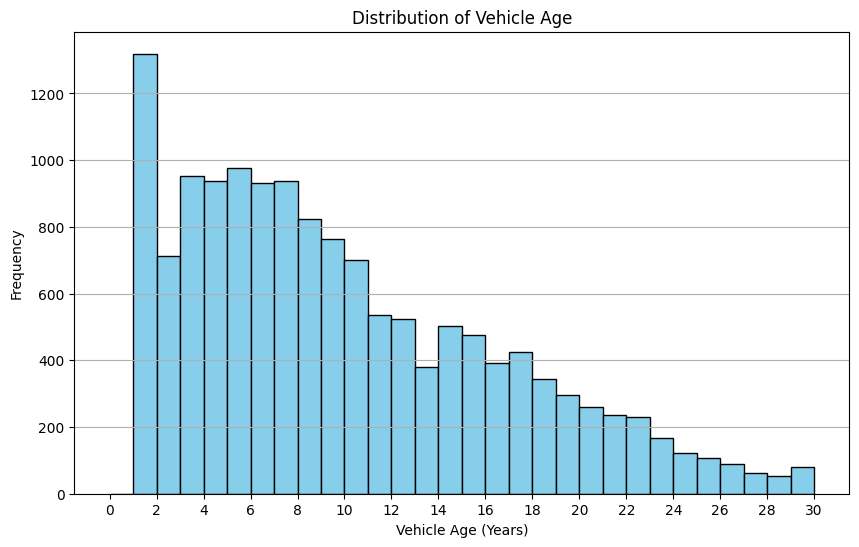

In [7]:
# Distribution of vehicle age
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['VEHAGE'], bins=range(0, 31, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Frequency')
plt.xticks(range(0, 31, 2))
plt.grid(axis='y')
plt.show()